## Data Preparation (Import libraries, data cleaning & data wrangling)
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vertikalwil/Data-Analyst/main/churn.csv')
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


> Terdapat beberapa missing values

In [4]:
df = df[~df.customerID.isnull()]

>Membuang baris semua customer id yang null.

In [5]:
for x in ['Gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod']:
    df[x] = df[x].fillna(df[x].mode()[0])

> Karena jumlah baris missing values per kolom itu tidak terlalu banyak, maka saya akan mengimpute berdasarkan nilai mode masing2 kolom

In [6]:
for x in ['Tenure','MonthlyCharges']:
    df[x] = df[x].fillna(df[x].mean())

> Untuk nilai yang continuous, saya akan mengimput berdasarkan nilai mean masing2 kolom.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7037 non-null   object 
 2   SeniorCitizen     7037 non-null   float64
 3   Partner           7037 non-null   object 
 4   Dependents        7037 non-null   object 
 5   Tenure            7037 non-null   float64
 6   Contract          7037 non-null   object 
 7   PaperlessBilling  7037 non-null   object 
 8   PaymentMethod     7037 non-null   object 
 9   MonthlyCharges    7037 non-null   float64
 10  TotalCharges      7037 non-null   float64
 11  Churn             7037 non-null   object 
dtypes: float64(4), object(8)
memory usage: 714.7+ KB


> Terlihat tidak ada lagi missing values.

In [8]:
df.SeniorCitizen = df.SeniorCitizen.astype(int)

In [9]:
#check for duplicate data, if True then there's no duplicate.
df.customerID.nunique() == len(df) 

False

In [10]:
df = df[~df.customerID.duplicated(keep=False)]

> Disini saya membuang semua customerID yang duplikat atau double karena transaksi tersebut merupakan transaksi ambigu.

In [11]:
df.customerID.nunique() == len(df) 

True

In [12]:
df.drop(columns=['customerID'], inplace=True)

> Membuang kolom customerID karena sudah tidak diperlukan.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7031
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7009 non-null   object 
 1   SeniorCitizen     7009 non-null   int32  
 2   Partner           7009 non-null   object 
 3   Dependents        7009 non-null   object 
 4   Tenure            7009 non-null   float64
 5   Contract          7009 non-null   object 
 6   PaperlessBilling  7009 non-null   object 
 7   PaymentMethod     7009 non-null   object 
 8   MonthlyCharges    7009 non-null   float64
 9   TotalCharges      7009 non-null   float64
 10  Churn             7009 non-null   object 
dtypes: float64(3), int32(1), object(7)
memory usage: 629.7+ KB


In [14]:
convert = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0,
    'Month-to-month':1,
    'One year':2,
    'Two year':3
}

In [15]:
for x in ['Gender','Contract','Partner','Dependents','PaperlessBilling','Churn']:
    df[x] = df[x].map(convert)

> Mengubah kolom binary dan ordinal menjadi numeric.

In [16]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1.0,1,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,2,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,1,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,2,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,1,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24.0,2,1,Mailed check,84.80,1990.50,0
7028,0,0,1,1,72.0,2,1,Credit card (automatic),103.20,7362.90,0
7029,0,0,1,1,11.0,1,1,Electronic check,29.60,346.45,0
7030,1,1,1,0,4.0,1,1,Mailed check,74.40,306.60,1


C:\Users\verti\AppData\Local\Temp\ipykernel_10032\3866356798.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, )


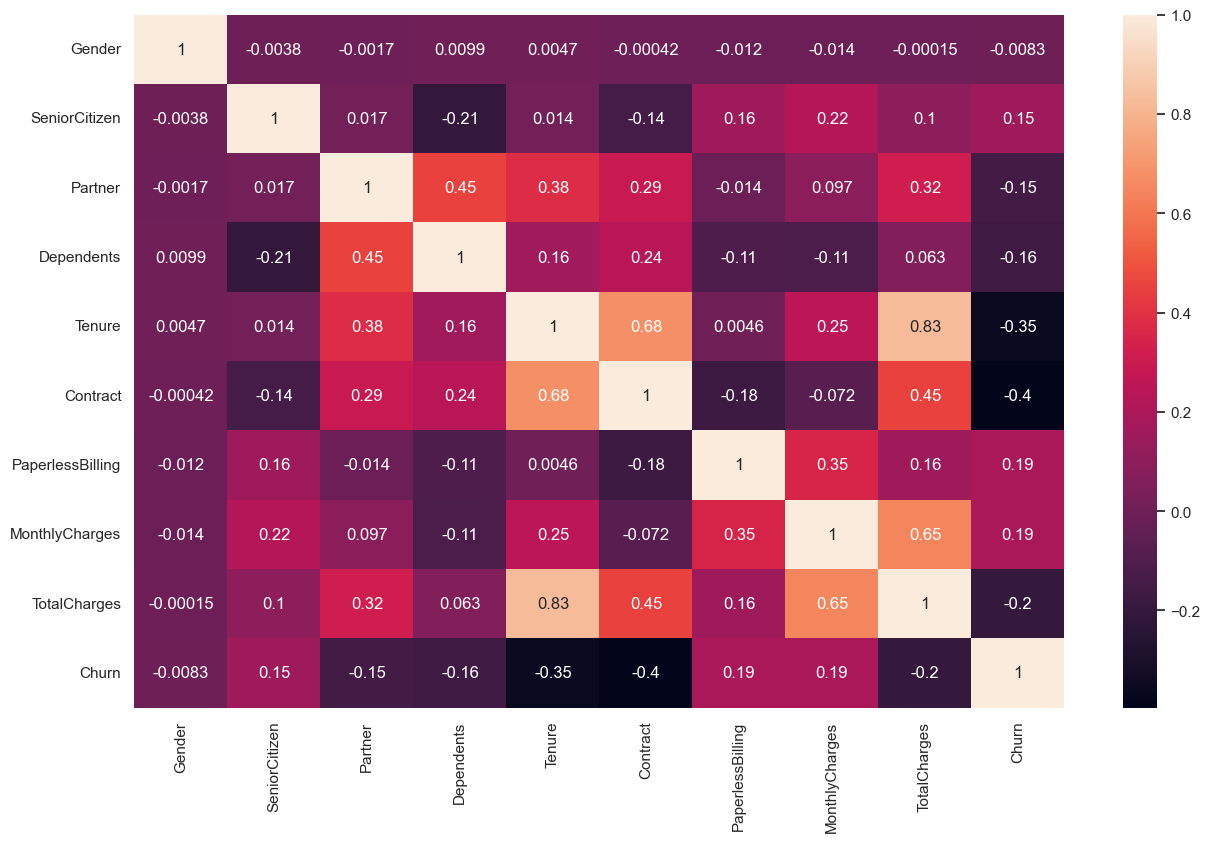

In [17]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, )
plt.show()

In [18]:
df.drop(columns=['TotalCharges'], inplace=True)

>drop fitur totalcharges karena memiliki korelasi tinggi dengan tenure.(multi-colinearity)

In [19]:
df = pd.get_dummies(df, columns = ['PaymentMethod'])

>One hot encoding multi categorical kolom.

In [20]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1.0,1,1,29.85,0,0,0,1,0
1,1,0,0,0,34.0,2,0,56.95,0,0,0,0,1
2,1,0,0,0,2.0,1,1,53.85,1,0,0,0,1
3,1,0,0,0,45.0,2,0,42.30,0,1,0,0,0
4,0,0,0,0,2.0,1,1,70.70,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24.0,2,1,84.80,0,0,0,0,1
7028,0,0,1,1,72.0,2,1,103.20,0,0,1,0,0
7029,0,0,1,1,11.0,1,1,29.60,0,0,0,1,0
7030,1,1,1,0,4.0,1,1,74.40,1,0,0,0,1


## Modelling

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Churn').to_numpy()
y = df[['Churn']].to_numpy()
y = y.reshape(len(y),)

# First splitting: pretrain and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [22]:
df.Churn.value_counts()

0    5146
1    1863
Name: Churn, dtype: int64

> Data yang ada adalah imbalanced, jadi metrics akurasi sudah pasti tidak bisa dipakai. Pilihan yang ada ialah recall, precision atau f1 score. Menurut saya metrics yang lebih tepat adalah menggunakan recall karena saya mau model saya memprediksi FN serendah mungkin (FN = prediksi tidak churn padahal faktanya churn) dari pada FP ( FP = prediksi churn padahal faktanya tidak churn). Catatan : pada kasus ini saya menganggap perusahaan akan mengalami kerugian lebih besar saat model memprediksi customer tidak churn padahal faktanya customer tersebut akan churn (kehilangan customer) dari pada model memprediksi customer akan churn padahal faktanya customer tidak akan churn (kehilangan sumber daya karena memprospek calon customer yang salah).

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (50,60,80,100,120),
    'max_depth':(7,8,9,10,11)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (7, 8, 9, 10, 11),
                         'n_estimators': (50, 60, 80, 100, 120)},
             scoring='recall')

In [25]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head(10)

,params,mean_test_score,rank_test_score
24,"{'max_depth': 11, 'n_estimators': 120}",0.510268,1
22,"{'max_depth': 11, 'n_estimators': 80}",0.508288,2
23,"{'max_depth': 11, 'n_estimators': 100}",0.507630,3
16,"{'max_depth': 10, 'n_estimators': 60}",0.506292,4
21,"{'max_depth': 11, 'n_estimators': 60}",0.504314,5
18,"{'max_depth': 10, 'n_estimators': 100}",0.503646,6
17,"{'max_depth': 10, 'n_estimators': 80}",0.502990,7
13,"{'max_depth': 9, 'n_estimators': 100}",0.502317,8
20,"{'max_depth': 11, 'n_estimators': 50}",0.501663,9
15,"{'max_depth': 10, 'n_estimators': 50}",0.500999,10


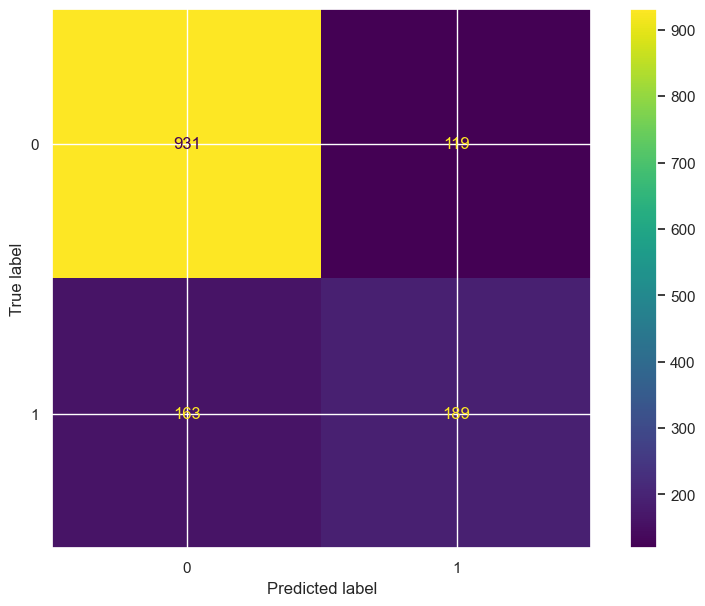

In [26]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [27]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1050
           1       0.61      0.54      0.57       352

    accuracy                           0.80      1402
   macro avg       0.73      0.71      0.72      1402
weighted avg       0.79      0.80      0.79      1402



>Interpretation:<br>
1.Dari semua hasil prediksi customer yang churn, hanya 61% yang benar-benar churn secara real.(precision 0.61)<br>
2.Model hanya bisa mengidentifikasi 54% customer yang churn secara real.(recall 0.54)

## Threshold Tuning

> Disini saya akan melakukan sedikit tuning pada threshold probabilitas model untuk mendapatkan hasil yang terbaik.

In [28]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

> split train dan validation untuk mentuning threshold

In [29]:
from sklearn import metrics
def threshold_score(model, xtest, ytest, thres):
    recall = []
    precision = []
    f1_score = []
    rocauc_score = []
    accuracy_score = []
    for k in thres:
        y = pd.DataFrame(model.predict_proba(xtest), columns=['%No','%Yes'])[['%Yes']]
        y['prediction'] = y['%Yes'].apply(lambda x: 1 if x > k else 0 )
        recall.append(metrics.recall_score(ytest, y.prediction))
        precision.append(metrics.precision_score(ytest, y.prediction))
        f1_score.append(metrics.f1_score(ytest, y.prediction))
        rocauc_score.append(metrics.roc_auc_score(ytest, y.prediction))
        accuracy_score.append(metrics.accuracy_score(ytest, y.prediction))
    dfresult = pd.DataFrame([thres,recall,precision,f1_score,rocauc_score,accuracy_score]).transpose()
    dfresult.columns = ['thresold','recall','precision','f1-score','RocAuc-score','Accuracy-score']
    return dfresult

In [30]:
#disini saya langsung menggunakan parameter terbaik yaitu max_depth=11 dan jumlah pohon 120.
clfrf = RandomForestClassifier(max_depth = 11, n_estimators=120)
clfrf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=120)

In [31]:
threshold_score(clfrf, x_validation, y_validation, np.arange(0.1, 1, 0.1))

,thresold,recall,precision,f1-score,RocAuc-score,Accuracy-score
0,0.1,0.947541,0.393197,0.555769,0.700821,0.588235
1,0.2,0.832787,0.462659,0.594848,0.735855,0.691622
2,0.3,0.731148,0.530952,0.615172,0.745011,0.751337
3,0.4,0.613115,0.578947,0.595541,0.723326,0.773619
4,0.5,0.468852,0.671362,0.552124,0.691587,0.793226
5,0.6,0.337705,0.691275,0.453744,0.640701,0.778966
6,0.7,0.209836,0.711111,0.324051,0.589006,0.762032
7,0.8,0.118033,0.750000,0.203966,0.551672,0.749554
8,0.9,0.016393,0.833333,0.032154,0.507585,0.731729


> Bisa dilihat bahwa pada threshold 0.3, recallnya cukup tinggi namun precisionnya tidak terlalu drop.

In [32]:
threshold_score(clfrf, x_test, y_test, [0.3])

,thresold,recall,precision,f1-score,RocAuc-score,Accuracy-score
0,0.3,0.769886,0.494526,0.602222,0.753038,0.74465


> Menggunakan threshold 0.3 sekarang model mampu mengidentifikasi customer churn sampai 77% (recall 0.77) walaupun ketepatan model dalam memprediksi customer yang churn turun menjadi 50% (precision 0.50). Kesimpulan: menggunakan threshold 0.3, meningkatkan recall sebanyak +-20% tetapi mengurangi precision sebanyak +-10% dari pada threshold 0.5.